# En este Notebook ejecutaremos codificación ordinal, one-hot y codificación por frecuencia y porcentajes, informada por el target y otras técnicas

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Para la codificacion ordinal y one-hot usando sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Para dividir el conjunto de datos
from sklearn.model_selection import train_test_split

In [13]:
# Cargando datos
data = pd.read_csv('/home/ia/cursoECI/cursoIV/Datasets/raw/credict_approval.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


### Codificación ordinal utilizando sklearn

In [14]:
# Hacemos una lista con las variables categóricas

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [15]:
# Separamos los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictores
    data['A16'],  # target
    test_size=0.3,  
    random_state=0)  # seed para reproducibilidad

X_train.shape, X_test.shape

((483, 15), (207, 15))

In [16]:
# Instanciamos y entrenamos el codificador entero
le = OrdinalEncoder()
le.fit(X_train[vars_categorical])

le.categories_

[array(['a', 'b', nan], dtype=object),
 array(['l', 'u', 'y', nan], dtype=object),
 array(['g', 'gg', 'p', nan], dtype=object),
 array(['aa', 'c', 'cc', 'd', 'e', 'ff', 'i', 'j', 'k', 'm', 'q', 'r', 'w',
        'x', nan], dtype=object),
 array(['bb', 'dd', 'ff', 'h', 'j', 'n', 'o', 'v', 'z', nan], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['g', 'p', 's'], dtype=object)]

In [17]:
# Transformamos los sets de datos y visualizamos

X_train_enc = le.transform(X_train[vars_categorical])
X_test_enc = le.transform(X_test[vars_categorical])

pd.DataFrame(X_train_enc, columns=vars_categorical).head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,0.0,1.0,0.0,1.0,7.0,1.0,1.0,1.0,0.0
1,0.0,1.0,0.0,10.0,7.0,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,12.0,7.0,1.0,1.0,0.0,0.0
3,1.0,2.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,9.0,7.0,1.0,1.0,1.0,0.0


### Codificacion one-hot utilizando sklearn

In [18]:
# Instanciamos el y entrenamos codificador

encoder = OneHotEncoder(categories='auto',
                        drop='first',  
                        sparse_output=False)

encoder.fit(X_train[vars_categorical])

OneHotEncoder(drop='first', sparse_output=False)

In [19]:
# Observamos las categorías aprendidas

encoder.categories_

[array(['a', 'b', nan], dtype=object),
 array(['l', 'u', 'y', nan], dtype=object),
 array(['g', 'gg', 'p', nan], dtype=object),
 array(['aa', 'c', 'cc', 'd', 'e', 'ff', 'i', 'j', 'k', 'm', 'q', 'r', 'w',
        'x', nan], dtype=object),
 array(['bb', 'dd', 'ff', 'h', 'j', 'n', 'o', 'v', 'z', nan], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['g', 'p', 's'], dtype=object)]

In [20]:
# Transformamos e inspeccionamos los sets de datos

X_train_enc = encoder.transform(X_train[vars_categorical])
X_test_enc = encoder.transform(X_test[vars_categorical])

pd.DataFrame(X_train_enc).head()
#pd.DataFrame(X_test_enc).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


Esto entra en una red neuronal 

In [34]:
# Podemos recuperar los nombres de las variables de la siguiente manera:

encoder.get_feature_names_out()

array(['A1_b', 'A1_nan', 'A4_u', 'A4_y', 'A4_nan', 'A5_gg', 'A5_p',
       'A5_nan', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j',
       'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A6_nan', 'A7_dd',
       'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A7_nan',
       'A9_t', 'A10_t', 'A12_t', 'A13_p', 'A13_s'], dtype=object)

In [22]:
# Visualizamos los valores más frecuentes de A7

X_train["A7"].value_counts().sort_values(ascending=False)

A7
v     277
h     101
ff     41
bb     39
z       7
dd      5
j       5
n       3
o       1
Name: count, dtype: int64

Codificación One hot categorías mas frecuentes


In [23]:
ohe_enc = OneHotEncoder(
    handle_unknown="infrequent_if_exist",  # categorías no vistas se tratarán como las menos frecuentes
    max_categories=5,  # el número máximo de categorías
    sparse_output=False,  
)

ohe_enc.set_output(transform="pandas")

ohe_enc.fit(X_train)

OneHotEncoder(handle_unknown='infrequent_if_exist', max_categories=5,
              sparse_output=False)

In [24]:
ohe_enc.infrequent_categories_

[None,
 array([13.75, 15.83, 15.92, 16.08, 16.17, 16.25, 16.33, 16.5 , 16.92,
        17.08, 17.25, 17.33, 17.42, 17.67, 17.92, 18.  , 18.08, 18.17,
        18.25, 18.42, 18.5 , 18.58, 18.67, 18.75, 18.92, 19.  , 19.17,
        19.33, 19.42, 19.5 , 19.58, 19.67, 19.75, 20.  , 20.08, 20.17,
        20.25, 20.33, 20.42, 20.5 , 20.67, 20.75, 20.83, 21.  , 21.08,
        21.17, 21.25, 21.33, 21.5 , 21.75, 21.83, 21.92, 22.  , 22.08,
        22.17, 22.25, 22.33, 22.42, 22.5 , 22.58, 22.67, 22.75, 22.83,
        22.92, 23.  , 23.08, 23.17, 23.25, 23.33, 23.42, 23.5 , 23.58,
        23.75, 23.92, 24.08, 24.33, 24.42, 24.5 , 24.58, 24.75, 25.17,
        25.25, 25.33, 25.42, 25.5 , 25.58, 25.67, 25.75, 25.83, 26.  ,
        26.08, 26.17, 26.25, 26.33, 26.58, 26.67, 26.75, 26.92, 27.  ,
        27.17, 27.25, 27.42, 27.58, 27.75, 27.83, 28.  , 28.08, 28.17,
        28.25, 28.42, 28.5 , 28.58, 28.67, 28.75, 28.92, 29.17, 29.25,
        29.42, 29.5 , 29.58, 29.67, 29.83, 29.92, 30.  , 30.08, 30.17,

In [25]:
# codificacación
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

# exploremos los resultados
X_train.head()

,A1_a,A1_b,A1_nan,A2_18.83,A2_25.0,A2_27.67,A2_nan,A2_infrequent_sklearn,A3_0.0,A3_1.5,...,A14_0.0,A14_100.0,A14_160.0,A14_200.0,A14_infrequent_sklearn,A15_0,A15_1,A15_500,A15_1000,A15_infrequent_sklearn
596,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
204,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
351,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Codificacion por frecuencia y porcentajes

In [26]:
# Separamos los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data,  # datos completos
    data['A16'],  # target
    test_size=0.3,  
    random_state=0)  # seed para reproducibilidad

X_train.shape, X_test.shape

((483, 16), (207, 16))

In [27]:
#Creamos funciones de procesamiento
def count_mappings(df, variable):
    return df[variable].value_counts().to_dict()


def frequency_mappings(df, variable):
    return (df[variable].value_counts() / len(df)).to_dict()


def encode(train, test, variable, mapping):
    train[variable] = train[variable].map(mapping)
    test[variable] = test[variable].map(mapping)

In [28]:
# Codificamos múltiples variables aplicando las funciones
for variable in vars_categorical:
    mappings = count_mappings(X_train, variable)
    encode(X_train, X_test, variable, mappings)


X_train.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
596,144.0,46.08,3.000,363.0,363.0,93.0,277.0,2.375,256,212,8,220,441,396.0,4159,1
303,144.0,15.92,2.875,363.0,363.0,56.0,277.0,0.085,227,271,0,263,441,120.0,0,0
204,335.0,36.33,2.125,115.0,115.0,48.0,277.0,0.085,256,212,1,263,441,50.0,1187,1
351,335.0,22.17,0.585,115.0,115.0,38.0,41.0,0.000,227,271,0,263,441,100.0,0,0
118,335.0,57.83,7.040,363.0,363.0,26.0,277.0,14.000,256,212,6,220,441,360.0,1332,1


### Codificación informada por la media

In [29]:
# Separamos los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data,  # datos completos
    data['A16'],  # target
    test_size=0.3,  
    random_state=0)  # seed para reproducibilidad

X_train.shape, X_test.shape

((483, 16), (207, 16))

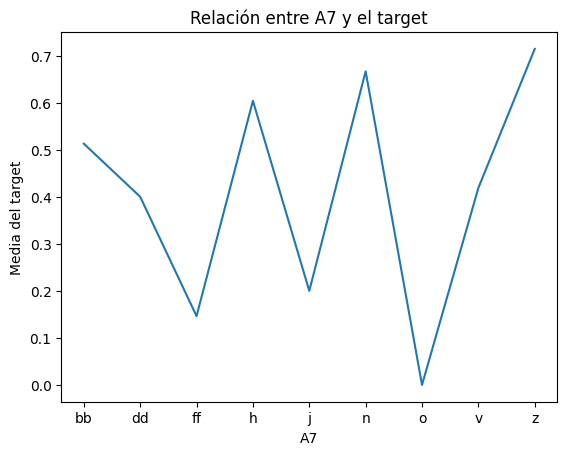

In [30]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relación entre A7 y el target')
plt.ylabel('Media del target')
plt.show()

In [31]:
# Creamos un diccionario con la media del target por categoría para la variable A7

ordered_labels = X_train.groupby(['A7'])['A16'].mean().to_dict()

ordered_labels

{'bb': 0.5128205128205128,
 'dd': 0.4,
 'ff': 0.14634146341463414,
 'h': 0.6039603960396039,
 'j': 0.2,
 'n': 0.6666666666666666,
 'o': 0.0,
 'v': 0.4187725631768953,
 'z': 0.7142857142857143}

In [32]:
# Reemplazamos las etiquetas con la media del target e inspeccionamos resultados

X_train['A7'] = X_train['A7'].map(ordered_labels)
X_test['A7'] = X_test['A7'].map(ordered_labels)

X_train['A7'].head()

596    0.418773
303    0.418773
204    0.418773
351    0.146341
118    0.418773
Name: A7, dtype: float64

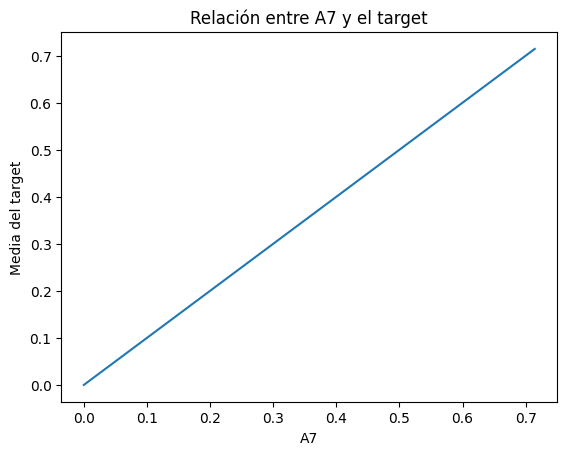

In [33]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relación entre A7 y el target')
plt.ylabel('Media del target')
plt.show()

### Codificación binaria

Se deja como ejercicio

### Codificación polar

Se deja como ejercicio